# Ensemble Learning

In [39]:
import sys
import sklearn
import pandas as pd
import numpy as np
import os

np.random.seed(42)
random_state = 42

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

##Download DS

In [40]:
import requests

url = "https://raw.githubusercontent.com/Ayoub-Elkhouzari/Datasets/main/Churn_Modelling.csv"  # Replace this with your dataset link

response = requests.get(url)

# Save the downloaded file
with open('Churn_Modelling.csv', 'wb') as file:
    file.write(response.content)

## Churn Modeling Dataset
##### This dataset contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [41]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.shape

(10000, 14)

#Preprocessing Dataset

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
dataset.select_dtypes(include=['object']).columns
# columns with categorical values

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [44]:
len(dataset.select_dtypes(include=['object']).columns)
# number of columns with categorical values

3

In [45]:
dataset.select_dtypes(include=['int64', 'float64']).columns
# columns with numerical values

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [46]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)
# number of columns with numerical values

11

In [47]:
# statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [48]:
# check if there are any null values
dataset.isnull().values.any()
dataset.shape

(10000, 14)

In [49]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId',	'Surname'])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
dataset.shape

(10000, 11)

In [51]:
# now we need to deal with dummy variables
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [52]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [53]:
dataset.shape

(10000, 12)

In [54]:
# Exited customers
(dataset.Exited == 1).sum()

2037

In [55]:
# Not exited customers
(dataset.Exited == 0).sum()

7963

In [56]:
X = dataset.drop(columns='Exited')
y = dataset['Exited']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, test_size=0.2)
print(y_test)

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
dataset.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

# Creating the model

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

## Decision Trees

In [93]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'X' and 'y' with your actual dataset
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree)*100)
feature_importance = pd.Series(tree_clf.feature_importances_, index=X.columns)
print(feature_importance)

85.75
CreditScore          0.000264
Age                  0.430532
Tenure               0.001629
Balance              0.026223
NumOfProducts        0.333907
HasCrCard            0.000000
IsActiveMember       0.154772
EstimatedSalary      0.014549
Geography_Germany    0.037785
Geography_Spain      0.000000
Gender_Male          0.000339
dtype: float64


In [94]:
confusion_matrix(y_test, y_pred_tree)

array([[1559,   48],
       [ 237,  156]])

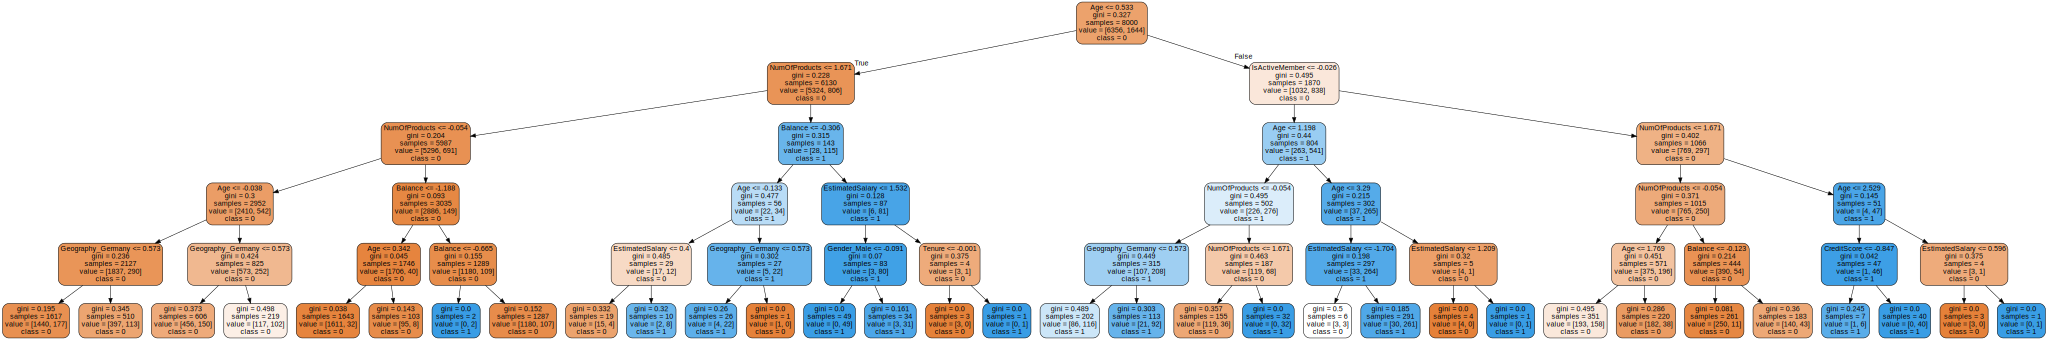

In [95]:
from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=X.columns,
        class_names=["0", "1"],
        rounded=True,
        filled=True
    )
graph = Source(dot_data)
graph

## Bagging

In [96]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.857


## Random Forest

In [97]:
classifier_rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.857


## Voting

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state = random_state)
rnd_clf = RandomForestClassifier(max_depth=None, n_estimators=300, random_state = random_state)
svm_clf = SVC(gamma="scale", probability=True, random_state = random_state)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [103]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [104]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.811
RandomForestClassifier 0.869
SVC 0.856
VotingClassifier 0.857


## SVC with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30.],
         'gamma': [0.01, 0.03, 0.1]},
    ]

svm_clf = SVC()
svm_grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1', verbose=2)
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0],
                          'gamma': [0.01, 0.03, 0.1], 'kernel': ['rbf']}],
             scoring='f1', verbose=2)

In [ ]:
svm_grid_search.best_score_

0.8901596789815969

In [ ]:
svm_grid_search.best_params_

{'C': 30.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have your dataset 'X' and 'y'
# Replace 'X' and 'y' with your actual dataset

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.9173333333333333
